In [39]:
import matplotlib.pyplot as plt
import pandas as pd

bikes_df = pd.read_csv("data/bikes/bike_data.csv")
bikes_df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,work_hours
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Prepare data from bikes_data.csv

In [40]:
bikes_df['dew_point_temperature'].fillna(bikes_df['dew_point_temperature'].mean(), inplace=True)

bikes_df['day'] = pd.DatetimeIndex(bikes_df['date'], dayfirst=True).day
bikes_df['month'] = pd.DatetimeIndex(bikes_df['date'], dayfirst=True).month
bikes_df['year'] = pd.DatetimeIndex(bikes_df['date'], dayfirst=True).year
bikes_df.drop('date', axis=1, inplace=True)

bikes_df = pd.get_dummies(bikes_df, columns=['seasons', 'holiday', 'work_hours'])
bikes_df.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,...,month,year,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,work_hours_No,work_hours_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,2017,0,0,0,1,0,1,0,1


In [41]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

X = bikes_df.drop('rented_bike_count', axis=1)
y = bikes_df['rented_bike_count']

models = [BaggingRegressor(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

kf = KFold(n_splits=5, random_state=1234, shuffle=True)

Pridobivanje napovedane vrednosti z uporabo zgrajenih napovednih modelov za vsak primerek iz množice testnih podatkov, za vsak prečni rez.
Izračun sledečih metrik za vsak prečni rez:
- povprečno absolutno napako,
- povprečno kvadratno napako,
- vrednost razložene variance

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

regression_results = pd.DataFrame(columns=['model', 'MAE', 'MSE', 'explained_variance'])

for model in models:
    model_name = model.__class__.__name__
    scores = {'mae': [], 'mse': [], 'explained_variance': []}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        ev = explained_variance_score(y_test, y_pred)

        scores['mae'].append(mae)
        scores['mse'].append(mse)
        scores['explained_variance'].append(ev)

    regression_results = regression_results.append({'model': model_name,
                                                    "MAE": scores['mae'],
                                                    "MSE": scores['mse'],
                                                    "explained_variance": scores['explained_variance'],
                                                    'mean_MAE': np.mean(scores['mae']),
                                                    'mean_MSE': np.mean(scores['mse']),
                                                    'mean_explained_variance': np.mean(scores['explained_variance'])},
                                                   ignore_index=True)

regression_results.head()

/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30208/3005172868.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({'model': model_name,
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30208/3005172868.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({'model': model_name,
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30208/3005172868.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results = regression_results.append({'model': model_name,
/var/folders/m7/dkyjm7gn71ggjt2b8p3ymthc0000gn/T/ipykernel_30208/3005172868.py:25: FutureWarning: The frame.append method is deprecated and

,model,MAE,MSE,explained_variance,mean_MAE,mean_MSE,mean_explained_variance
0,BaggingRegressor,"[140.0007420091324, 131.96466894977166, 134.65...","[54213.555793379, 49759.12503995434, 53714.112...","[0.8774282599479595, 0.8819769113738872, 0.866...",137.843071,53461.268369,0.871317
1,RandomForestRegressor,"[133.03083904109587, 125.34239726027397, 129.3...","[48550.078069920084, 44195.96950239727, 50101....","[0.8901329395498712, 0.895156977813146, 0.8756...",131.102289,47920.251761,0.884637
2,AdaBoostRegressor,"[367.1150469709735, 378.34533002155143, 354.26...","[181313.09254174295, 188413.37585310775, 17837...","[0.6755651289016176, 0.6928873131062209, 0.662...",360.032959,176674.528745,0.681048
3,GradientBoostingRegressor,"[173.39660163838124, 164.53110480269024, 168.0...","[66875.77031272175, 61174.4236563629, 65770.43...","[0.8485992428947086, 0.8548821187861845, 0.836...",167.506617,63140.032908,0.848057


- Shranite vse vrednosti vseh metrik za posamezen algoritem strojnega učenja.
- Izračunajte povprečne vrednosti posamezne metrike za posamezen algoritem strojnega učenja glede na vrednosti v prečnih rezih.
- Za ansambelske metode (posebej za klasifikacijski problem in posebej za regresijski problem) izrišite grafikone kvartilov (angl. boxplot) za vsako izmed izračunanih metrik, pri čemer naj bodo v obeh primerih za vse štiri algoritme strojnega učenja grafikoni kvartilov združeni na eni sliki (skupno torej 7 slik).

In [43]:
mae_results = {}
mse_results = {}
explained_variance_results = {}

for model in models:
    model_name = model.__class__.__name__
    mae_results[model_name] = regression_results[regression_results['model'] == model_name]['MAE'].values[0]
    mse_results[model_name] = regression_results[regression_results['model'] == model_name]['MSE'].values[0]
    explained_variance_results[model_name] = regression_results[regression_results['model'] == model_name]['explained_variance'].values[0]
    
mae_results = pd.DataFrame(mae_results)
mse_results = pd.DataFrame(mse_results)
explained_variance_results = pd.DataFrame(explained_variance_results)

mae_results = mae_results.melt(var_name='model', value_name='MAE')
mse_results = mse_results.melt(var_name='model', value_name='MSE')
explained_variance_results = explained_variance_results.melt(var_name='model', value_name='explained_variance')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

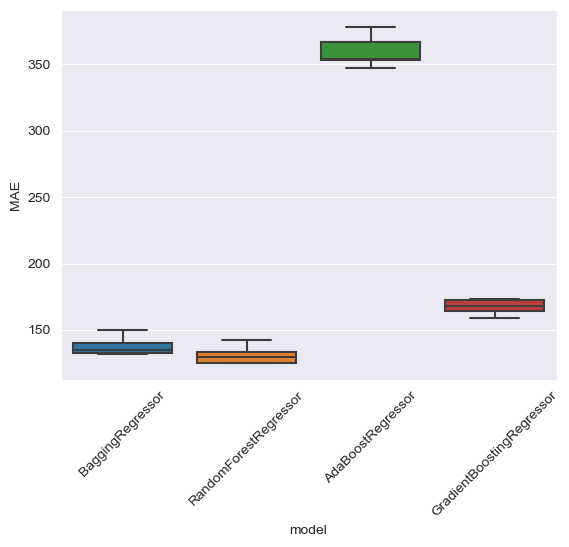

In [44]:
import seaborn as sns

sns.boxplot(data=mae_results, x='model', y='MAE')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

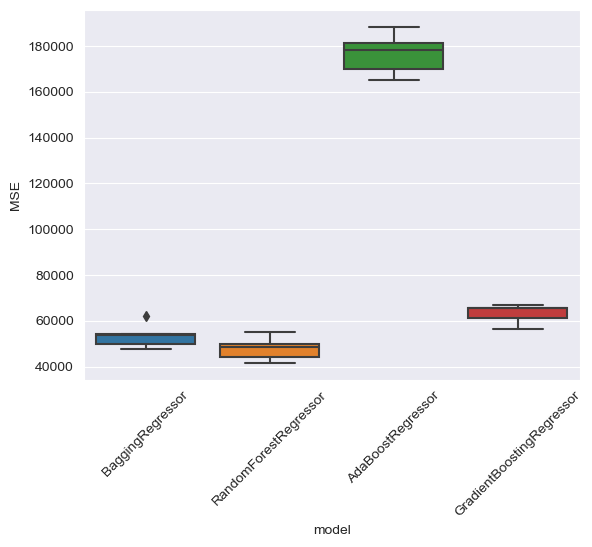

In [45]:
sns.boxplot(data=mse_results, x='model', y='MSE')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'BaggingRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'AdaBoostRegressor'),
  Text(3, 0, 'GradientBoostingRegressor')])

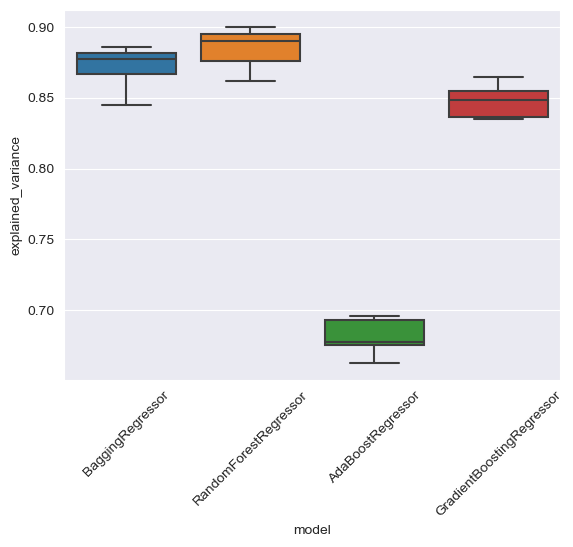

In [46]:
sns.boxplot(data=explained_variance_results, x='model', y='explained_variance')
plt.xticks(rotation=45)

- Izrišite stolpične diagrame za vse povprečne vrednosti posamezne metrike (posebej za klasifikacijski problem in posebej za regresijski problem) uporabljenih ansambelskih metod pri čemer pri klasifikacijskem problemu vključite rezultate pridobljene v nalogi 2, pri regresijskem problemu pa vključite rezultate pridobljene v nalogi 1 (skupno torej 7 slik).

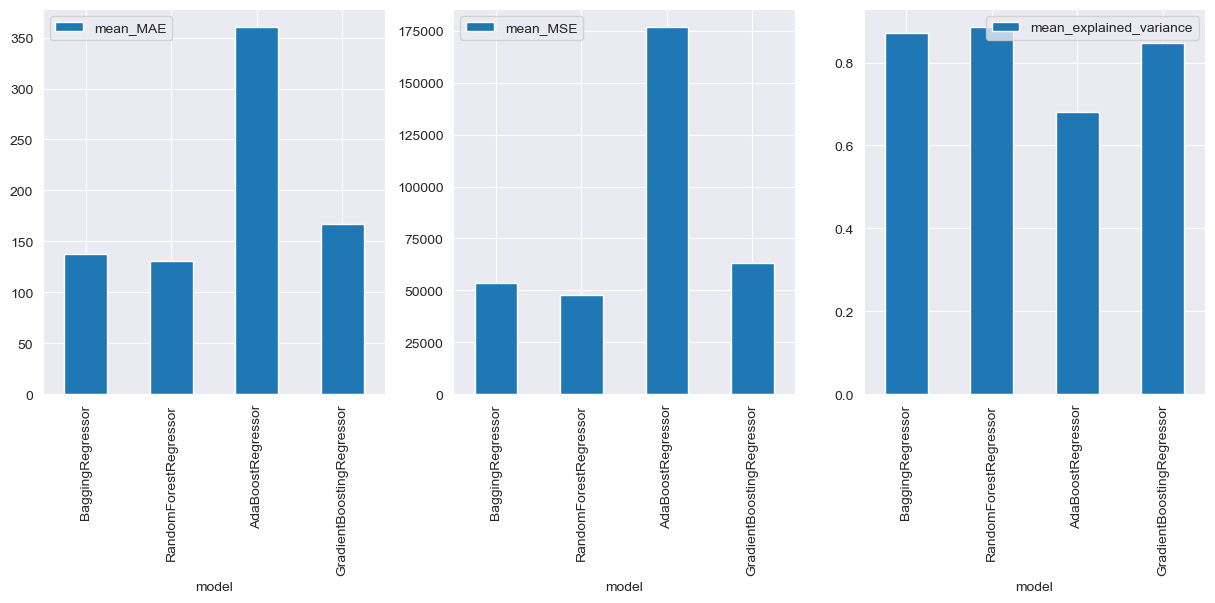

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
regression_results.plot.bar(x='model', y='mean_MAE', ax=axes[0])
regression_results.plot.bar(x='model', y='mean_MSE', ax=axes[1])
regression_results.plot.bar(x='model', y='mean_explained_variance', ax=axes[2])
plt.show()